# Export all models

This notebook is dedicated to export the v10 model to ONNX and keras versiosn. Usually, keras versions is used into the prometheus framework. The ONNX version will be used into the athena framework.

**NOTE**: ONNX is a Microsoft API for inference.

**NOTE**: We will export all tunings from r2 derivation

In [1]:
from saphyra import crossval_table, get_color_fader
import saphyra
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence


In [2]:
def create_op_dict(op):
    d = {
              op+'_pd_ref'    : "reference/"+op+"_cutbased/pd_ref#0",
              op+'_fa_ref'    : "reference/"+op+"_cutbased/fa_ref#0",
              op+'_sp_ref'    : "reference/"+op+"_cutbased/sp_ref",
              op+'_pd_val'    : "reference/"+op+"_cutbased/pd_val#0",
              op+'_fa_val'    : "reference/"+op+"_cutbased/fa_val#0",
              op+'_sp_val'    : "reference/"+op+"_cutbased/sp_val",
              op+'_pd_op'     : "reference/"+op+"_cutbased/pd_op#0",
              op+'_fa_op'     : "reference/"+op+"_cutbased/fa_op#0",
              op+'_sp_op'     : "reference/"+op+"_cutbased/sp_op",

              # Counts
              op+'_pd_ref_passed'    : "reference/"+op+"_cutbased/pd_ref#1",
              op+'_fa_ref_passed'    : "reference/"+op+"_cutbased/fa_ref#1",
              op+'_pd_ref_total'     : "reference/"+op+"_cutbased/pd_ref#2",
              op+'_fa_ref_total'     : "reference/"+op+"_cutbased/fa_ref#2",
              op+'_pd_val_passed'    : "reference/"+op+"_cutbased/pd_val#1",
              op+'_fa_val_passed'    : "reference/"+op+"_cutbased/fa_val#1",
              op+'_pd_val_total'     : "reference/"+op+"_cutbased/pd_val#2",
              op+'_fa_val_total'     : "reference/"+op+"_cutbased/fa_val#2",
              op+'_pd_op_passed'     : "reference/"+op+"_cutbased/pd_op#1",
              op+'_fa_op_passed'     : "reference/"+op+"_cutbased/fa_op#1",
              op+'_pd_op_total'      : "reference/"+op+"_cutbased/pd_op#2",
              op+'_fa_op_total'      : "reference/"+op+"_cutbased/fa_op#2",
    }
    return d

tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              } )

tuned_info.update(create_op_dict('tight'))
tuned_info.update(create_op_dict('medium'))
tuned_info.update(create_op_dict('loose'))
tuned_info.update(create_op_dict('vloose'))

In [3]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [4]:
cv_v7  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v8  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v9  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v10 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v11 = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v1_el = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v2_el = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [5]:
# just for comparison
cv_v7.fill(  '/Volumes/castor/tuning_data/Zee/v7/*.r0/*/*.gz', 'v7')
cv_v8.fill(  '/Volumes/castor/tuning_data/Zee/v8/*.r0/*/*.gz', 'v8')
cv_v9.fill(  '/Volumes/castor/tuning_data/Zee/v9/*.v9_et*.r0/*/*.gz', 'v9')

# new tuning
cv_v10.fill( '/Volumes/castor/tuning_data/Zee/v10/*.r2/*/*.gz', 'v10') # select r2 reco version
cv_v11.fill( '/Volumes/castor/tuning_data/Zee/v11/*.r3/*/*.gz', 'v11') 
cv_v1_el.fill( '/Volumes/castor/tuning_data/Zee/v1_el/*.r0/*/*.gz', 'v1-el')
cv_v2_el.fill( '/Volumes/castor/tuning_data/Zee/v2_el/*.r0/*/*.gz', 'v2-el') 

2020-12-04 01:15:51,926 | Py.crossval_table                       INFO Reading file for v7 tag from /Volumes/castor/tuning_data/Zee/v7/*.r0/*/*.gz
2020-12-04 01:15:51,926 | Py.crossval_table                       INFO There are 2500 files for this task...
2020-12-04 01:15:51,926 | Py.crossval_table                       INFO Filling the table... 
2020-12-04 01:16:56,724 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2020-12-04 01:16:57,459 | Py.crossval_table                       INFO Reading file for v8 tag from /Volumes/castor/tuning_data/Zee/v8/*.r0/*/*.gz
2020-12-04 01:16:57,459 | Py.crossval_table                       INFO There are 2500 files for this task...
2020-12-04 01:16:57,459 | Py.crossval_table                       INFO Filling the table... 
2020-12-04 01:20:57,613 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2020-12-04 01:20:58,237 | Py.crossval_table             

In [6]:
cv_v7.to_csv('table_v7.csv')
cv_v8.to_csv('table_v8.csv')
cv_v9.to_csv('table_v9.csv')
cv_v10.to_csv('table_v10.csv')
cv_v11.to_csv('table_v11.csv')
cv_v1_el.to_csv('table_v1_el.csv')
cv_v2_el.to_csv('table_v2_el.csv')

**NOTE** Use the cell below to rerun all tables from the csv file.

In [5]:
cv_v7.from_csv('table_v7.csv')
cv_v8.from_csv('table_v8.csv')
cv_v9.from_csv('table_v9.csv')
cv_v10.from_csv('table_v10.csv')
cv_v11.from_csv('table_v11.csv')
cv_v1_el.from_csv('table_v1_el.csv')
cv_v2_el.from_csv('table_v2_el.csv')

### 1.1) Get best inits and sorts:

In [7]:
best_inits_v7 = cv_v7.filter_inits("max_sp_val")
best_sorts_v7 = cv_v7.filter_sorts( best_inits_v7 , 'max_sp_op')
best_inits_v7 = best_inits_v7.loc[best_inits_v7.model_idx==3]

In [8]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]

In [9]:
best_inits_v9 = cv_v9.filter_inits("max_sp_val")
best_sorts_v9 = cv_v9.filter_sorts( best_inits_v9 , 'max_sp_op')

In [10]:
best_inits_v10 = cv_v10.filter_inits("max_sp_val")
best_sorts_v10 = cv_v10.filter_sorts( best_inits_v10 , 'max_sp_op')

In [11]:
best_inits_v11 = cv_v11.filter_inits("max_sp_val")
best_sorts_v11 = cv_v11.filter_sorts( best_inits_v11 , 'max_sp_op')

In [12]:
best_inits_v1_el = cv_v1_el.filter_inits("max_sp_val")
best_sorts_v1_el = cv_v1_el.filter_sorts( best_inits_v1_el , 'max_sp_op')

In [13]:
best_inits_v2_el = cv_v2_el.filter_inits("max_sp_val")
best_sorts_v2_el = cv_v2_el.filter_sorts( best_inits_v2_el , 'max_sp_op')

In [14]:
best_inits = pd.concat([best_inits_v7,best_inits_v8,best_inits_v9,best_inits_v10,
                        best_inits_v11,best_inits_v1_el,best_inits_v2_el])
best_sorts = pd.concat([best_sorts_v7,best_sorts_v8,best_sorts_v9,best_sorts_v10,
                        best_sorts_v11,best_sorts_v1_el,best_sorts_v2_el])

### 1.2) Make the table:

In [15]:
for op in ['tight','medium','loose','vloose']:
    cv_v7.dump_beamer_table( best_inits ,  [op], 'tuning_v7_to_v2_el_'+op, 
                             title = op+' Tunings (v7 to v11 and v1-el to v2-el)', 
                             tags = ['v7','v8','v9','v10','v11','v1-el','v2-el'])

2020-12-04 01:24:43,848 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v7_to_v2_el_tight.pdf latex code...
2020-12-04 01:24:54,631 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v7_to_v2_el_medium.pdf latex code...
2020-12-04 01:25:05,349 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v7_to_v2_el_loose.pdf latex code...
2020-12-04 01:25:15,618 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v7_to_v2_el_vloose.pdf latex code...


### 1.3) Plot training curves:

In [16]:
cv_v7.plot_training_curves( best_inits_v7, best_sorts_v7 , 'v7' )

In [17]:
cv_v8.plot_training_curves( best_inits_v8, best_sorts_v8 , 'v8' )

In [18]:
cv_v9.plot_training_curves( best_inits_v9, best_sorts_v9 , 'v9' )

In [19]:
cv_v10.plot_training_curves( best_inits_v10, best_sorts_v10 , 'v10' )

In [20]:
cv_v11.plot_training_curves( best_inits_v11, best_sorts_v11 , 'v11' )

In [21]:
cv_v1_el.plot_training_curves( best_inits_v1_el, best_sorts_v1_el , 'v1-el' )

In [22]:
cv_v2_el.plot_training_curves( best_inits_v2_el, best_sorts_v2_el , 'v2-el' )

### 1.4) Plot RoC curves:

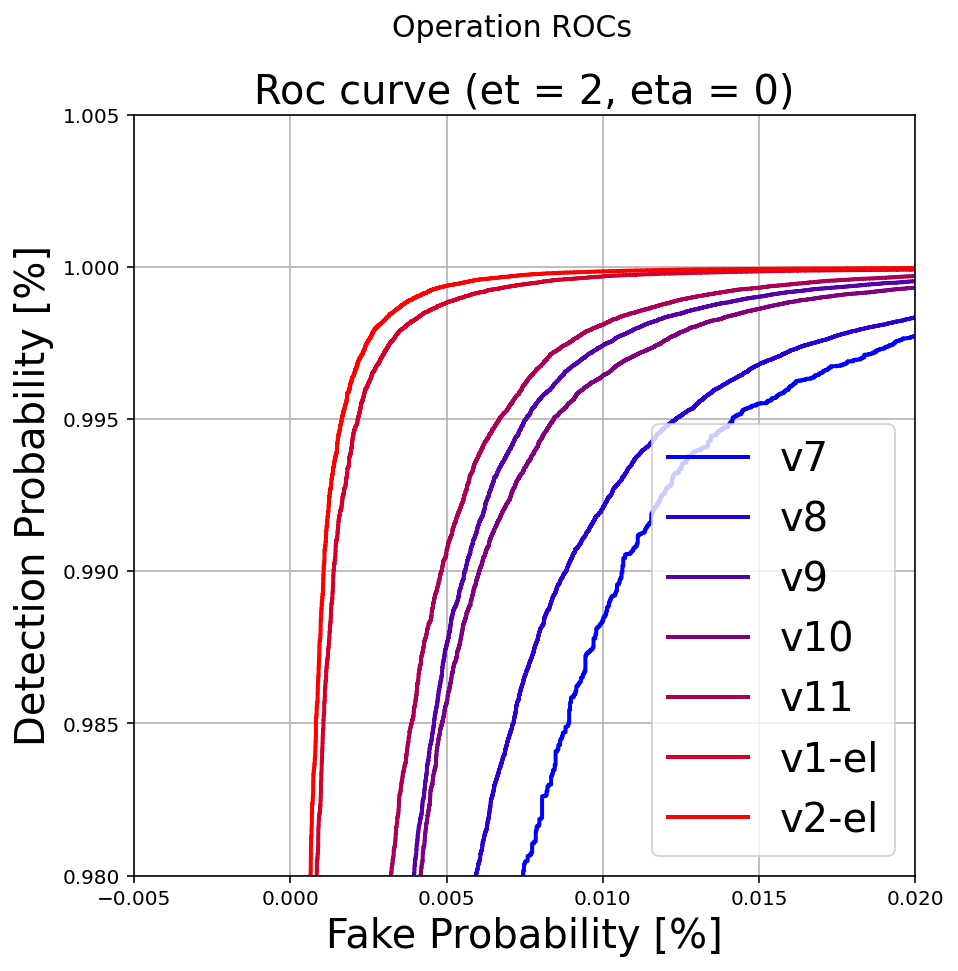

In [25]:
cv_v7.plot_roc_curves( best_sorts, ['v7', 'v8', 'v9','v10','v11','v1-el','v2-el'], 
                        ['v7', 'v8', 'v9','v10','v11','v1-el','v2-el'], 
                        'roc_v7_to_v2_el_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',7) ,
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

In [24]:
cv_v7.plot_roc_curves( best_sorts, ['v7', 'v8', 'v9','v10','v11','v1-el','v2-el'], 
                       ['v7', 'v8', 'v9','v10','v11','v1-el','v2-el'], 
                        'rocs_v7_to_v2_el.pdf',display=False, colors=get_color_fader('blue','red',7),
                       figsize=(30,30))

## 2) Export models:

In [31]:
def export( best_sorts_from_tag, output_format , dirname):
    basepath = os.getcwd()
    os.mkdir(basepath+'/'+dirname)
    os.mkdir(basepath+'/'+dirname+'/models')
    os.chdir(basepath+'/'+dirname+'/models')
    best_models_from_tag = cv_v7.get_best_models( best_sorts_from_tag , remove_last=True, with_history=False)
    for op in ['Tight','Medium','Loose','VeryLoose']:
        conf_format = 'ElectronRinger%sTriggerConfig.conf'%op
        cv_v7.export( best_models_from_tag, output_format.format(op=op) , conf_format, to_onnx=False)
    os.system('mv *.conf ..')
    os.chdir(basepath)

### 2.1) Export v9 tunings

In [33]:
export( best_sorts_v9,'data17_13TeV_EGAM1_probes_lhmedium_EGAM7_vetolhvloose.model_v9.electron{op}.et%d_eta%d', 
       'TrigL2_20201204_v9')

### 2.2) Export the new v10 tunings;

In [34]:
export( best_sorts_v10,'data17_13TeV_EGAM1_probes_lhmedium_EGAM7_vetolhvloose.model_v10.electron{op}.et%d_eta%d',
       'TrigL2_20201204_v10')

### 2.3) Export v11 tunings:

In [35]:
export( best_sorts_v11,'data17_13TeV_EGAM1_probes_lhmedium_EGAM7_vetolhvloose.model_v11.electron{op}.et%d_eta%d',
       'TrigL2_20201204_v11')

### 2.4) Export v1_el tunings:

In [36]:
export( best_sorts_v1_el,'data17_13TeV_EGAM1_probes_lhmedium_EGAM7_vetolhvloose.model_v1_el.electron{op}.et%d_eta%d',
       'TrigL2_20201204_v1_el')

### 2.5) Export v2_el tunings:

In [37]:
export( best_sorts_v2_el,'data17_13TeV_EGAM1_probes_lhmedium_EGAM7_vetolhvloose.model_v2_el.electron{op}.et%d_eta%d',
       'TrigL2_20201204_v2_el')